In [18]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# File to Load
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw_df = pd.read_csv(olympic_csv)
olympic_raw_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Find the number of participants in each games.
participants = olympic_raw_df.groupby("Games")["Name"].count()
participants

Games
1896 Summer      380
1900 Summer     1936
1904 Summer     1301
1906 Summer     1733
1908 Summer     3101
1912 Summer     4040
1920 Summer     4292
1924 Summer     5233
1924 Winter      460
1928 Summer     4992
1928 Winter      582
1932 Summer     2969
1932 Winter      352
1936 Summer     6506
1936 Winter      895
1948 Summer     6405
1948 Winter     1075
1952 Summer     8270
1952 Winter     1088
1956 Summer     5127
1956 Winter     1307
1960 Summer     8119
1960 Winter     1116
1964 Summer     7702
1964 Winter     1778
1968 Summer     8588
1968 Winter     1891
1972 Summer    10304
1972 Winter     1655
1976 Summer     8641
1976 Winter     1861
1980 Summer     7191
1980 Winter     1746
1984 Summer     9454
1984 Winter     2134
1988 Summer    12037
1988 Winter     2639
1992 Summer    12977
1992 Winter     3436
1994 Winter     3160
1996 Summer    13780
1998 Winter     3605
2000 Summer    13821
2002 Winter     4109
2004 Summer    13443
2006 Winter     4382
2008 Summer    13602
2010 Wi

In [4]:
# Explore unique values for teams.
olympic_raw_df["Team"].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [5]:
# Summary statistics for the data frame.
olympic_raw_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# Filter for games after WWII
post_war_df = olympic_raw_df[olympic_raw_df["Year"] >= 1948]
post_war_df.describe()

,ID,Age,Height,Weight,Year
count,232344.000000,229138.000000,203996.000000,203266.000000,232344.000000
mean,68326.449760,25.143503,175.327639,70.662816,1987.848354
std,39026.858799,5.720776,10.589578,14.387908,19.815354
min,1.000000,11.000000,127.000000,25.000000,1948.000000
25%,34801.000000,21.000000,168.000000,60.000000,1972.000000
50%,68292.500000,24.000000,175.000000,70.000000,1992.000000
75%,102129.000000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,84.000000,226.000000,214.000000,2016.000000


In [8]:
# Filter for winter and summer games
summer_post_war_df = post_war_df[post_war_df.Season == "Summer"]
winter_post_war_df = post_war_df[post_war_df["Season"] == "Winter"]
summer_post_war_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN


In [15]:
# Create data frames consisting only of medal winnners.
summer_medal_winners_post_war_df = summer_post_war_df[(summer_post_war_df["Medal"] == "Gold") |\
                                                      (summer_post_war_df["Medal"] == "Silver") |\
                                                      (summer_post_war_df["Medal"] == "Bronze")
                                                     ]
winter_medal_winners_post_war_df = winter_post_war_df[(winter_post_war_df["Medal"] == "Gold") |\
                                                      (winter_post_war_df["Medal"] == "Silver") |\
                                                      (winter_post_war_df["Medal"] == "Bronze")
                                                     ]

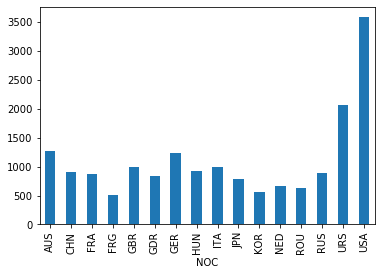

In [22]:
# Create a simple bar chart of medals won by country in the post war era for the Summer games.
country_medal_counts_summer = summer_medal_winners_post_war_df.groupby("NOC")["Medal"].count()
high_medals_summer = country_medal_counts_summer[country_medal_counts_summer > 500]
high_medals_summer.plot(kind="bar")

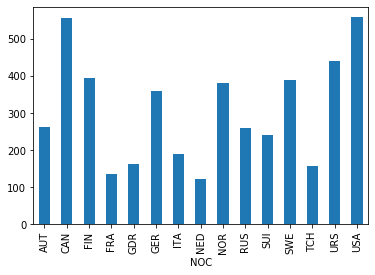

In [25]:
# Create a simple bar chart of medals won by country in the post war era for the Winter games.
country_medal_counts_winter = winter_medal_winners_post_war_df.groupby("NOC")["Medal"].count()
high_medals_winter = country_medal_counts_winter[country_medal_counts_winter > 100]
high_medals_winter.plot(kind="bar")

In [28]:
# Count countries by NOC.
len(olympic_raw_df["NOC"].unique())

230

In [38]:
# Find a list of host cities and countries.
host_cities_df = pd.read_csv("resources/list-host-cities-olympic-943j.csv")
host_cities_df.head()

,City,Country,Continent,Summer (Olympiad),Winter,Year,Opening Ceremony,Closing Ceremony
0,Athens,Greece,Europe,I,-,1896.0,April 6,April 15
1,Paris,France,Europe,II,-,1900.0,May 14,October 28
2,St. Louis,United States,North America,III,-,1904.0,July 1,November 23
3,London,United Kingdom,Europe,IV,-,1908.0,April 27,October 31
4,Stockholm,Sweden,Europe,V,-,1912.0,May 5,July 22


In [44]:
# Create dictionaries to convert between NOC and country.
noc_regions_df = pd.read_csv("resources/noc_regions.csv")
noc_to_country = {}
for index, row in noc_regions_df.iterrows():
    noc_to_country[row["NOC"]] = row["region"]
country_to_noc = {}
for index, row in noc_regions_df.iterrows():
    noc_to_country[row["region"]] = row["NOC"]

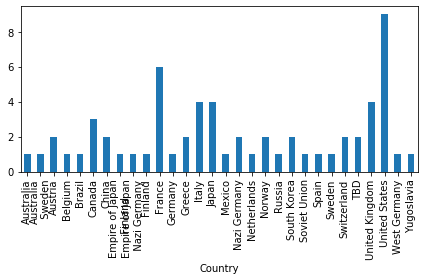

In [49]:
# Find which countries have hosted the most games.
host_cities_df.groupby("Country")["City"].count().plot(kind="bar")
plt.tight_layout()
plt.show()